In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# dataset overview

In [2]:
tips_data=pd.read_csv(r"C:\Users\mahab\Downloads\Telegram Desktop\tip.csv")

In [3]:
tips_data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
# checking the nan values 
tips_data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [6]:
tips_data.duplicated().sum()

1

In [7]:
tips_data.drop_duplicates(inplace=True)

In [8]:
tips_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  243 non-null    float64
 1   tip         243 non-null    float64
 2   sex         243 non-null    object 
 3   smoker      243 non-null    object 
 4   day         243 non-null    object 
 5   time        243 non-null    object 
 6   size        243 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [9]:
tips_data.shape

(243, 7)

In [10]:
tips_data.describe()

,total_bill,tip,size
count,243.000000,243.000000,243.000000
mean,19.813868,3.002387,2.572016
std,8.910071,1.385002,0.952356
min,3.070000,1.000000,1.000000
25%,13.380000,2.000000,2.000000
50%,17.810000,2.920000,2.000000
75%,24.175000,3.575000,3.000000
max,50.810000,10.000000,6.000000


In [11]:
tips_data.describe(include='object')

,sex,smoker,day,time
count,243,243,243,243
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


#  Univariate Analysis

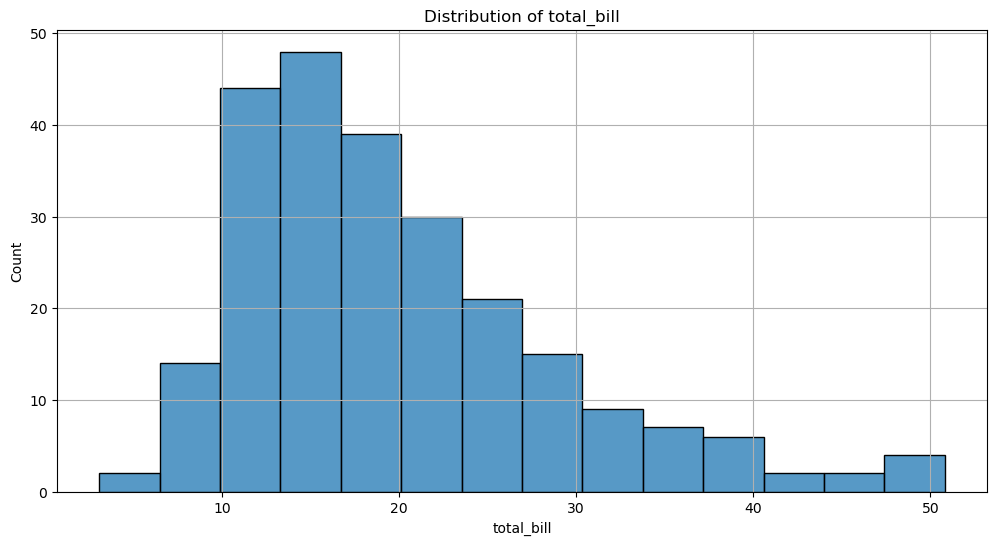

In [12]:
# 1. Analyze the distribution of the total_bill column using a histogram and boxplot

plt.figure(figsize=(12,6))
sns.histplot(tips_data,x=tips_data['total_bill'])
plt.title('Distribution of total_bill')
plt.grid()
plt.show()

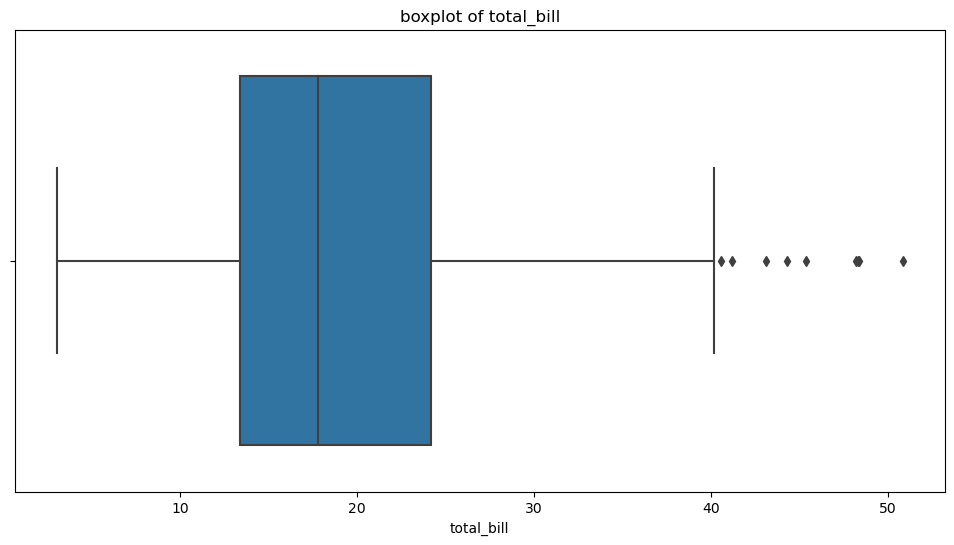

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(tips_data,x=tips_data['total_bill'])
plt.title('boxplot of total_bill')
plt.show()

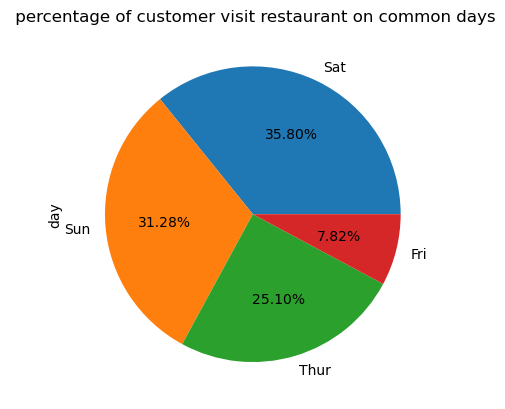

In [14]:
# 2. Find the most common day when customers visit the restaurant.
tips_data['day'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title(' percentage of customer visit restaurant on common days')
plt.show()


<Axes: xlabel='sex', ylabel='count'>

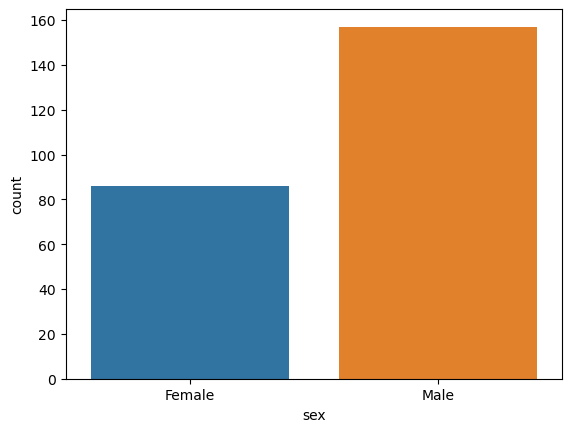

In [15]:
# 3. Count the number of male and female customers. Visualize this using a bar plot.

sns.countplot(tips_data,x=tips_data['sex'])

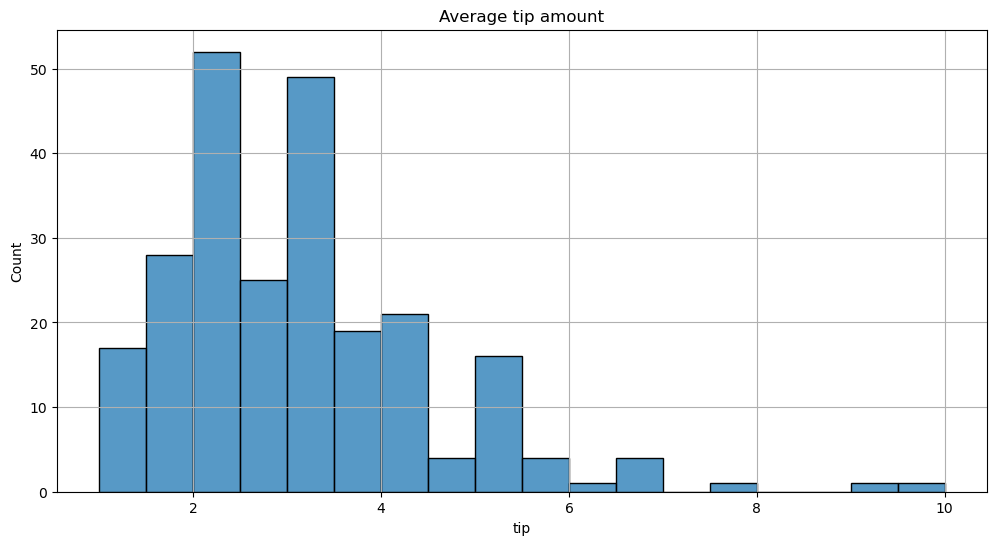

In [16]:
# Check the distribution of tips. What is the average tip amount?
plt.figure(figsize=(12,6))
sns.histplot(tips_data,x=tips_data['tip'])
plt.title('Average tip amount')
plt.grid()
plt.show()

#  Bivariate Analysis

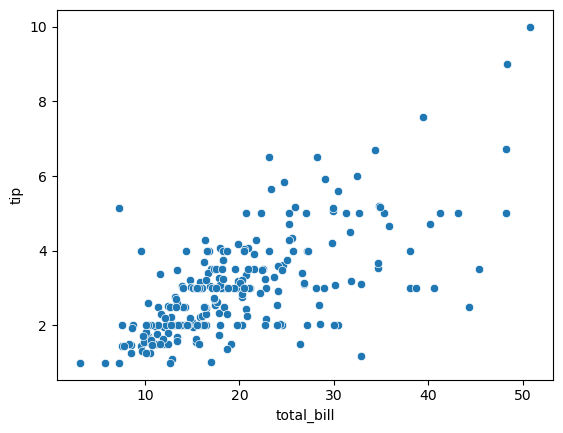

In [17]:
#1. Create a scatter plot to visualize the relationship between total_bill and tip. Doesthe tip amount increase with the total bill?
     

sns.scatterplot(tips_data,x=tips_data['total_bill'],y=tips_data['tip'])
plt.show()

#### here we can see that if the total_bill is increasing then the tips also increaseing

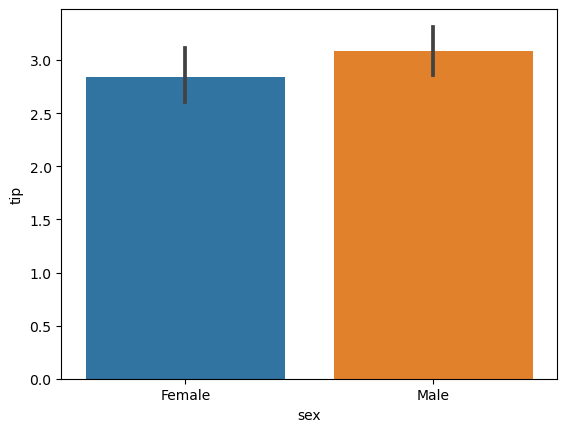

In [18]:
#2. Compare the average tip amount given by male and female customers. Use a bar plot to visualize this.
     
sns.barplot(tips_data,y=tips_data['tip'],x=tips_data['sex'])
plt.show()

<Axes: xlabel='tip_percentage', ylabel='time'>

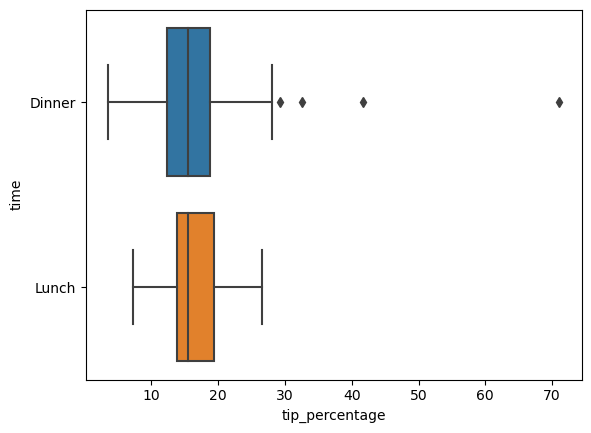

In [19]:

#3. Analyze how the tip percentage (tip / total_bill * 100) varies across different
#time (Lunch vs. Dinner). Use a boxplot to visualize this.


tips_data['tip_percentage']=(tips_data['tip']/tips_data['total_bill'])*100

sns.boxplot(tips_data,x=tips_data['tip_percentage'],y='time')

<Axes: >

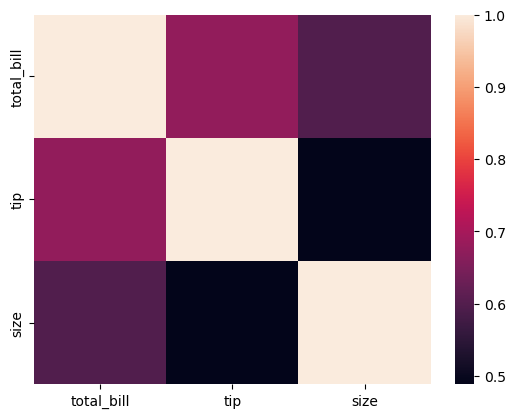

In [20]:
# 4. Create a heatmap to display the correlation matrix of the numerical columns.

sns.heatmap(tips_data[['total_bill','tip','size']].corr())

# Grouped Analysis

In [21]:
#1. Find the average total_bill and tip for each day of the week
average_bill=tips_data.groupby(['day'])[['total_bill','tip']].mean().reset_index()
average_bill

,day,total_bill,tip
0,Fri,17.151579,2.734737
1,Sat,20.441379,2.993103
2,Sun,21.410000,3.255132
3,Thur,17.759508,2.784098


In [22]:
# 2. Determine the day with the highest average tip percentage.
avg_tip_percentage_by_day = tips_data.groupby('day')['tip_percentage'].mean().reset_index()

avg_tip_percentage_by_day.max().reset_index()


,index,0
0,day,Thur
1,tip_percentage,16.991303


In [23]:
# 3. Calculate the average total_bill grouped by size. Visualize this using a bar plot

avg_bill_by_size = tips_data.groupby('size')['total_bill'].mean().reset_index()
avg_bill_by_size

,size,total_bill
0,1,7.242500
1,2,16.470258
2,3,23.277632
3,4,28.613514
4,5,30.068000
5,6,34.830000


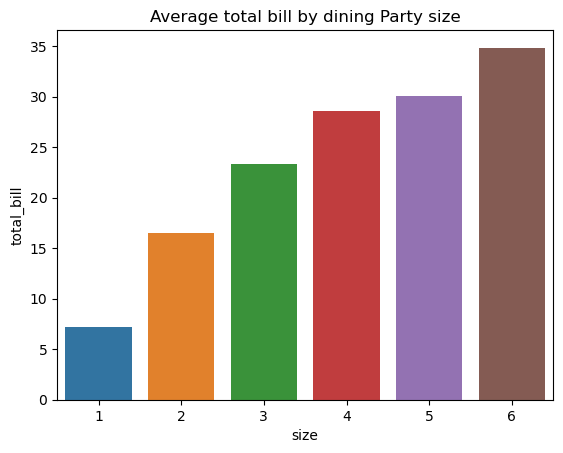

In [24]:
sns.barplot(x=avg_bill_by_size['size'],y=avg_bill_by_size['total_bill'])
plt.title('Average total bill by dining Party size')
plt.show()          

# Advanced Analysis


In [25]:
#Add a new column tip_percentage to the dataset and calculate it as (tip /total_bill) * 100.

tips_data['tip_percentage']=(tips_data['tip']/tips_data['total_bill'])*100

In [26]:
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [27]:
# Find the time (Lunch or Dinner) with the highest average tip_percentage.
average_tip_percentage=tips_data.groupby('time')['tip_percentage'].mean().reset_index()
highest_average_tip_percentage=average_tip_percentage.max().reset_index()
highest_average_tip_percentage

,index,0
0,time,Lunch
1,tip_percentage,16.428139


In [28]:
# Analyze the tipping behavior based on smoking preference (smoker). Who tips more,
#smokers or non-smokers?

tips_data.groupby('smoker')['tip_percentage'].mean().reset_index()

,smoker,tip_percentage
0,No,15.932846
1,Yes,16.329767


# Visualization Challenge

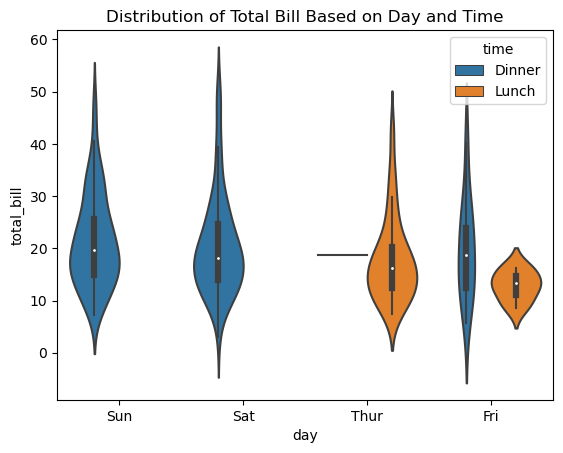

In [29]:
#1. Create a violin plot to analyze the distribution of total_bill based on day and time

sns.violinplot(tips_data,x=tips_data['day'],y=tips_data['total_bill'],hue=tips_data['time'])
plt.title('Distribution of Total Bill Based on Day and Time')
plt.show()

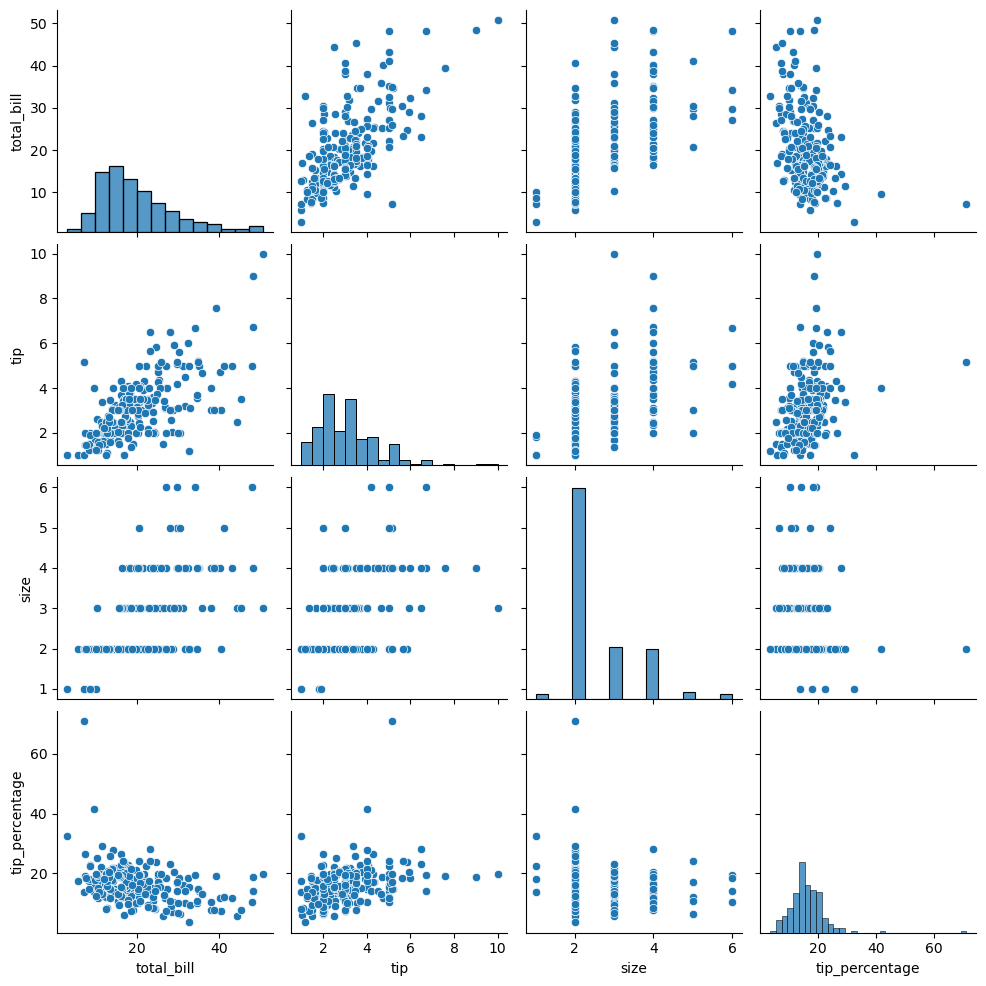

In [30]:
#2. Create a pair plot for the numerical columns in the dataset. What insights can yougather from it?

sns.pairplot(tips_data[['total_bill','tip','size','tip_percentage']])
plt.show()